In [1]:
pip list

Package                           VersionNote: you may need to restart the kernel to use updated packages.

--------------------------------- -------------------
aext-assistant                    4.20.0
aext-assistant-server             4.20.0
aext-core                         4.20.0
aext-core-server                  4.20.0
aext_environments_server          4.20.0
aext-panels                       4.20.0
aext-panels-server                4.20.0
aext-project-filebrowser-server   4.20.0
aext-share-notebook               4.20.0
aext-share-notebook-server        4.20.0
aext-shared                       4.20.0
aext-toolbox                      4.20.0
aiobotocore                       2.19.0
aiohappyeyeballs                  2.4.4
aiohttp                           3.11.10
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
alembic                           1.16.2
altair                            5.5.0
anaconda-anon-usage  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import GridSearchCV, train_test_split

In [4]:
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm

In [5]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, \
r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, confusion_matrix

In [6]:
df =pd.read_csv("Downloads/mhealth_raw_data.csv.zip")
df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.449020,-1.01030,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.449020,-1.01030,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.449020,-1.01030,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.456860,-1.00820,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.456860,-1.00820,0.025862,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-3.7198,-8.9071,0.294230,0.041176,-0.99384,-0.480600,0,subject10
1215741,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-3.7160,-8.7455,0.448140,0.041176,-0.99384,-0.480600,0,subject10
1215742,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-3.8824,-9.1155,0.450480,0.041176,-0.99384,-0.480600,0,subject10
1215743,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-3.5564,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0,subject10


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215745 entries, 0 to 1215744
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   alx       1215745 non-null  float64
 1   aly       1215745 non-null  float64
 2   alz       1215745 non-null  float64
 3   glx       1215745 non-null  float64
 4   gly       1215745 non-null  float64
 5   glz       1215745 non-null  float64
 6   arx       1215745 non-null  float64
 7   ary       1215745 non-null  float64
 8   arz       1215745 non-null  float64
 9   grx       1215745 non-null  float64
 10  gry       1215745 non-null  float64
 11  grz       1215745 non-null  float64
 12  Activity  1215745 non-null  int64  
 13  subject   1215745 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 129.9+ MB


In [8]:
df.isnull().sum()

alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alx,1215745.0,1.494200,3.826485,-22.1460,0.14131,1.308900,2.575800,20.0540
aly,1215745.0,-9.692878,4.171303,-19.6190,-10.20100,-9.670300,-9.042200,21.1610
alz,1215745.0,-0.954806,5.461803,-19.3730,-2.64940,-0.016456,1.301300,25.0150
glx,1215745.0,-0.001599,0.491217,-2.1466,-0.43599,-0.014842,0.448980,60.4840
gly,1215745.0,-0.616632,0.354641,-7.7899,-0.81801,-0.707320,-0.540340,2.0113
glz,1215745.0,-0.158781,0.546798,-2.6267,-0.59332,-0.190570,0.322200,2.7701
arx,1215745.0,-3.713413,4.763586,-22.3610,-6.07600,-2.977600,-1.193700,19.8640
ary,1215745.0,-5.805526,5.757639,-18.9720,-9.40420,-7.461500,-2.533900,22.1910
arz,1215745.0,2.393880,3.876503,-18.2390,0.12965,1.928100,4.914700,25.7410
grx,1215745.0,-0.276106,0.527689,-8.3392,-0.70588,-0.354900,0.096078,3.3196


In [10]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='Activity'>

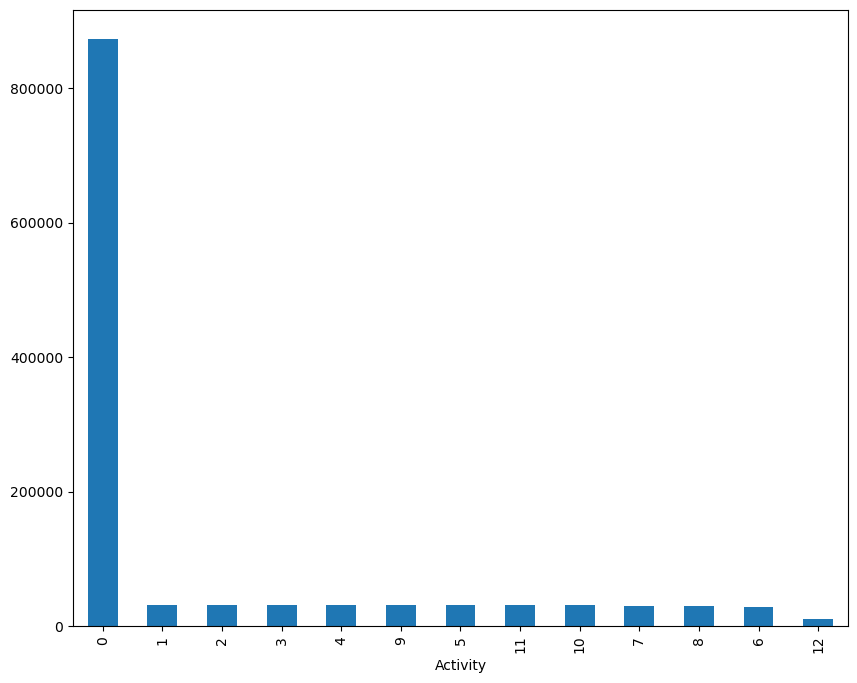

In [11]:
plt.figure(figsize=(10,8))
df['Activity'].value_counts().plot.bar()

In [12]:
df['Activity'].value_counts()

Activity
0     872550
1      30720
2      30720
3      30720
4      30720
9      30720
5      30720
11     30720
10     30720
7      29441
8      29337
6      28315
12     10342
Name: count, dtype: int64

In [13]:
df= df[df['Activity'] != 0]

<Axes: xlabel='Activity'>

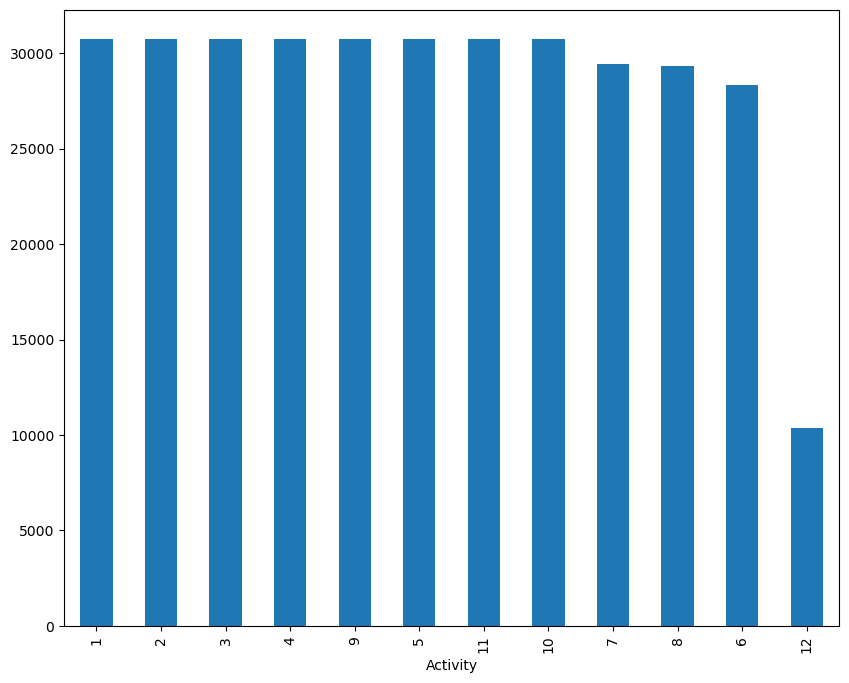

In [14]:
plt.figure(figsize=(10,8))
df['Activity'].value_counts().plot.bar()

In [15]:
#EDA
activity_label = {
    1:"Standing still(1 min)",
    2:"Sitting and relaxing(1 min)",
    3:"Lying down(1 min)",
    4:"Walking(1 min)",
    5:"Climbing stairs(1 min)",
    6:"Waist bends forward(20x)",
    7:"Frontal elevation of arms(20x)",
    8:"Knees bending (crouching)(20x)",
    9:"Cycling(1 min)",
    10:"Jogging(1 min)",
    11:"Running(1 min)",
    12:"Jump front & back(20x)"
}



============================= Standing still(1 min) - a =====================



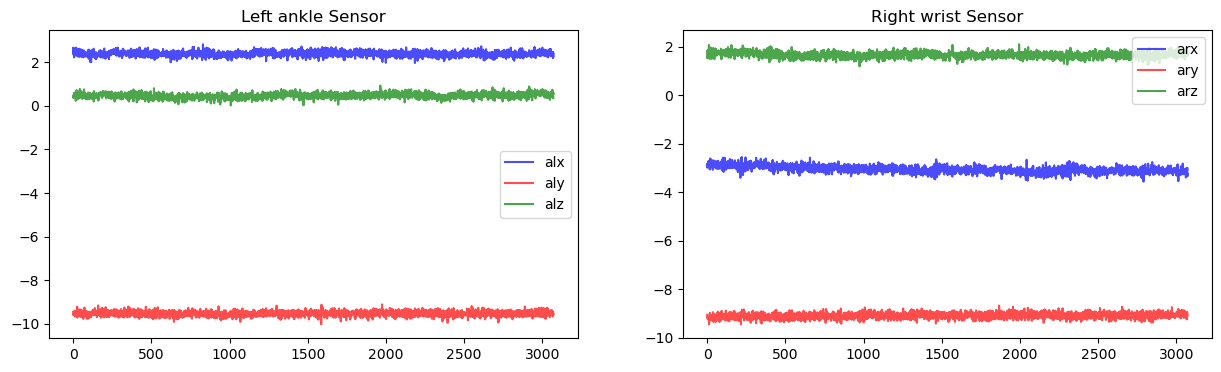



============================= Standing still(1 min) - g =====================



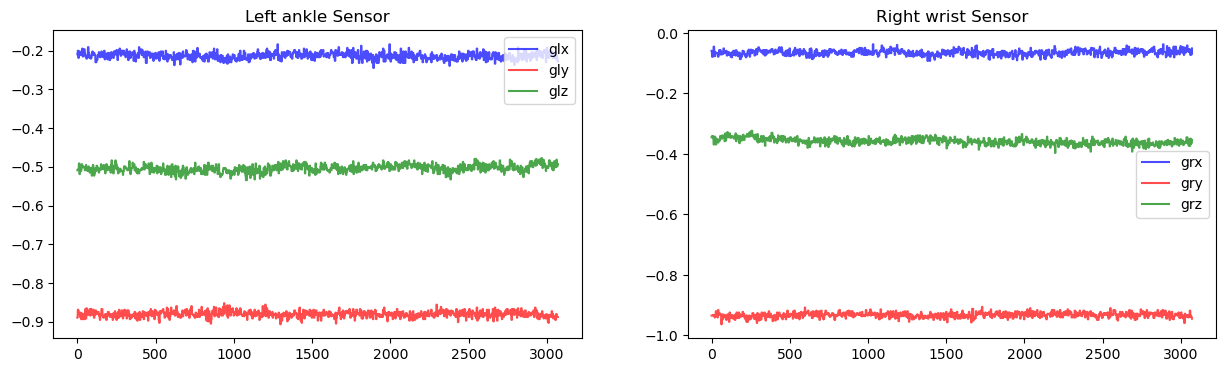



============================= Sitting and relaxing(1 min) - a =====================



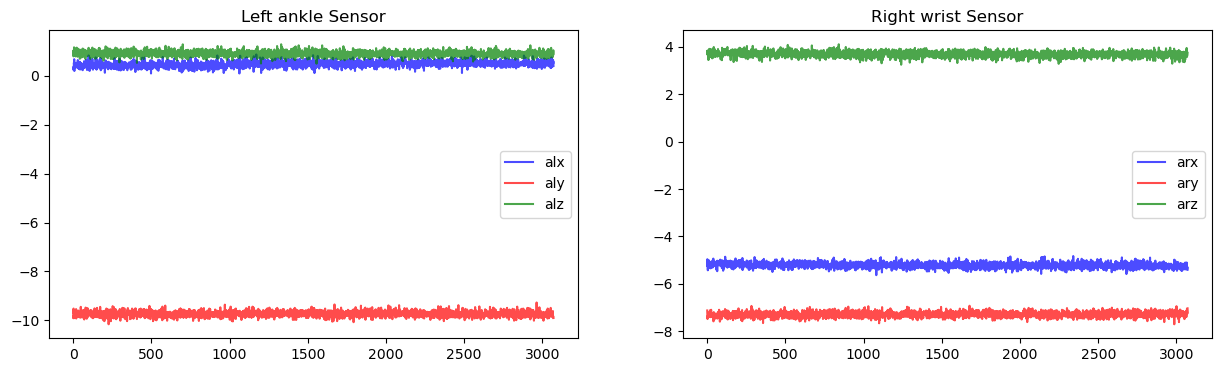



============================= Sitting and relaxing(1 min) - g =====================



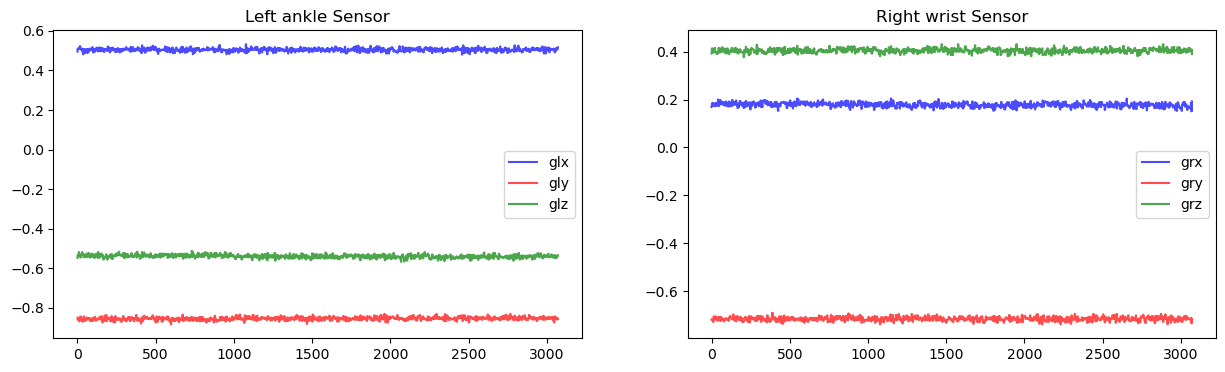



============================= Lying down(1 min) - a =====================



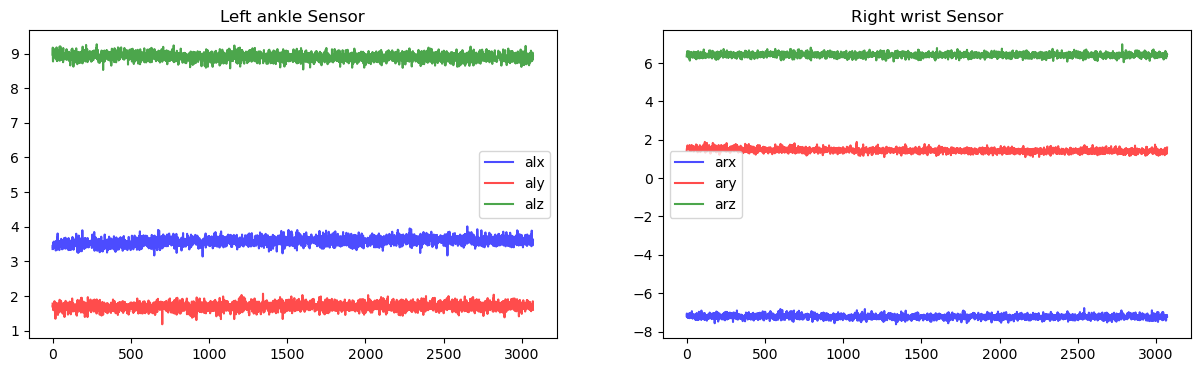



============================= Lying down(1 min) - g =====================



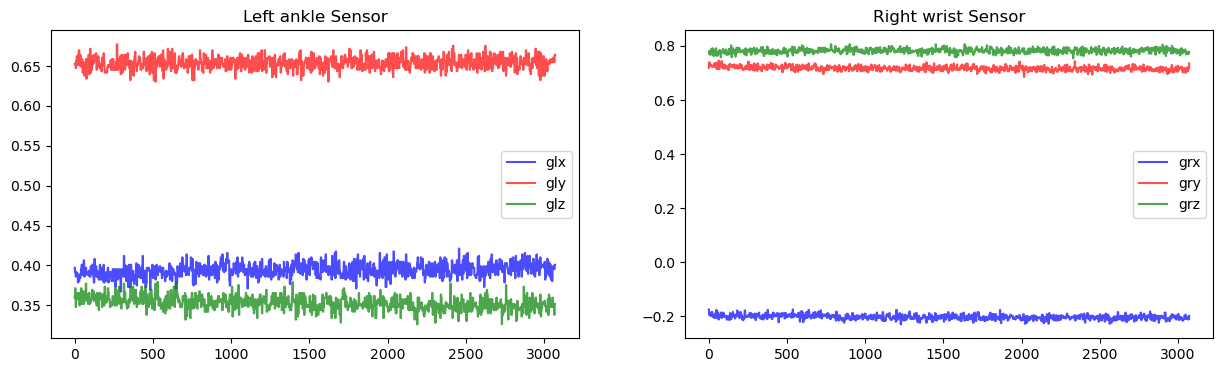



============================= Walking(1 min) - a =====================



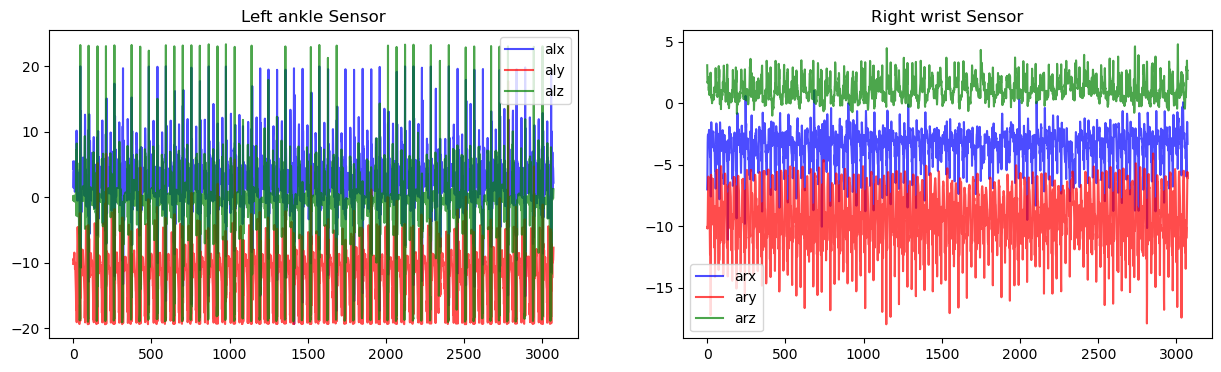



============================= Walking(1 min) - g =====================



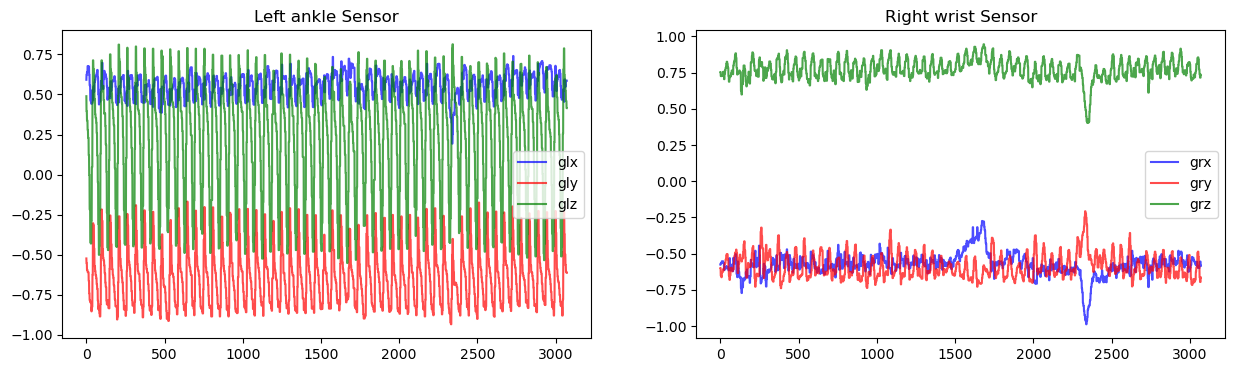



============================= Climbing stairs(1 min) - a =====================



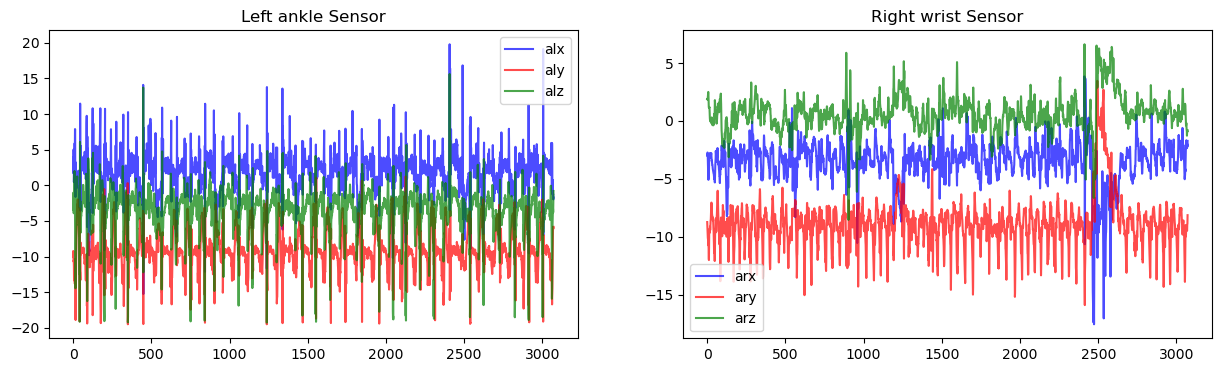



============================= Climbing stairs(1 min) - g =====================



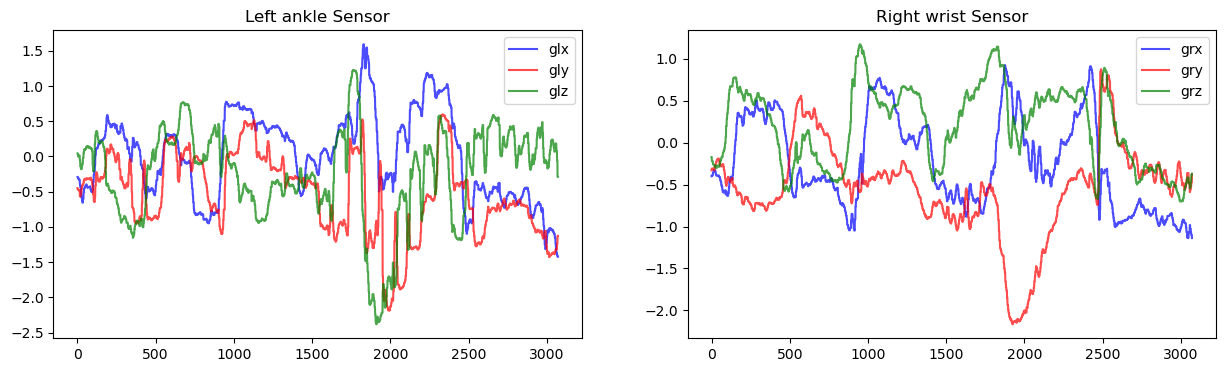



============================= Waist bends forward(20x) - a =====================



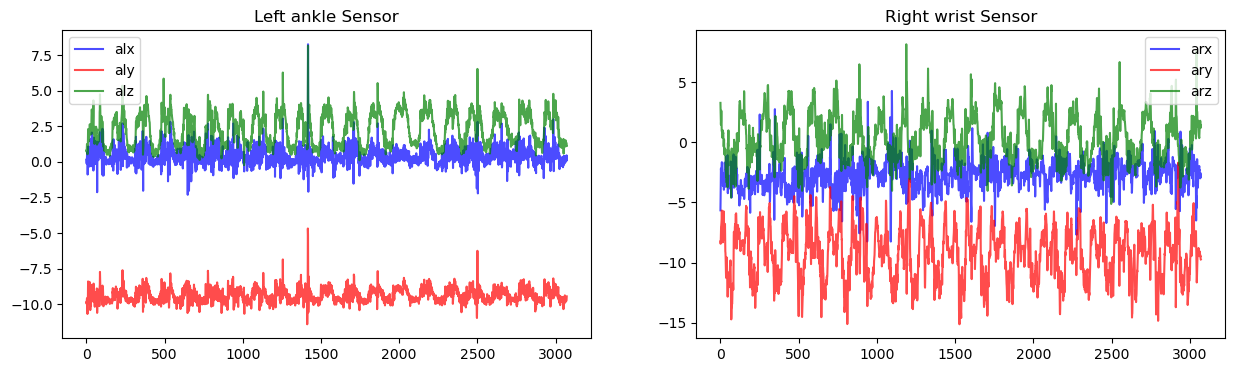



============================= Waist bends forward(20x) - g =====================



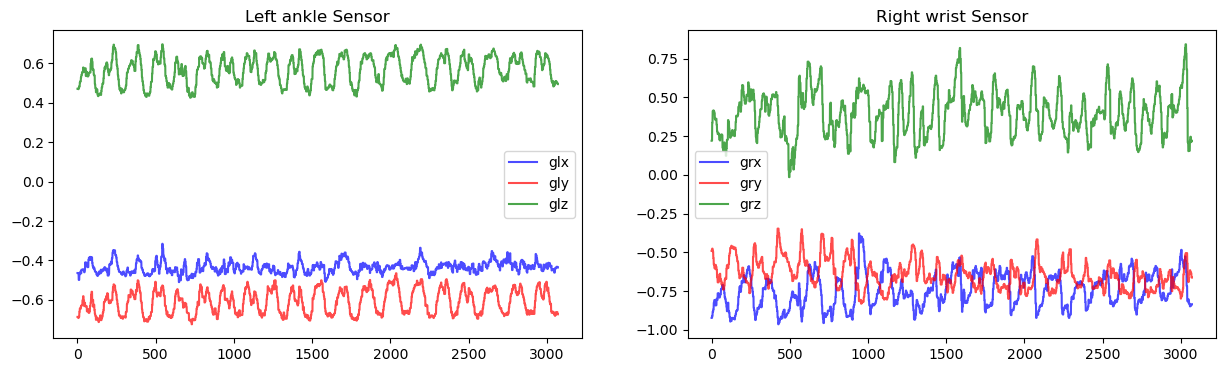



============================= Frontal elevation of arms(20x) - a =====================



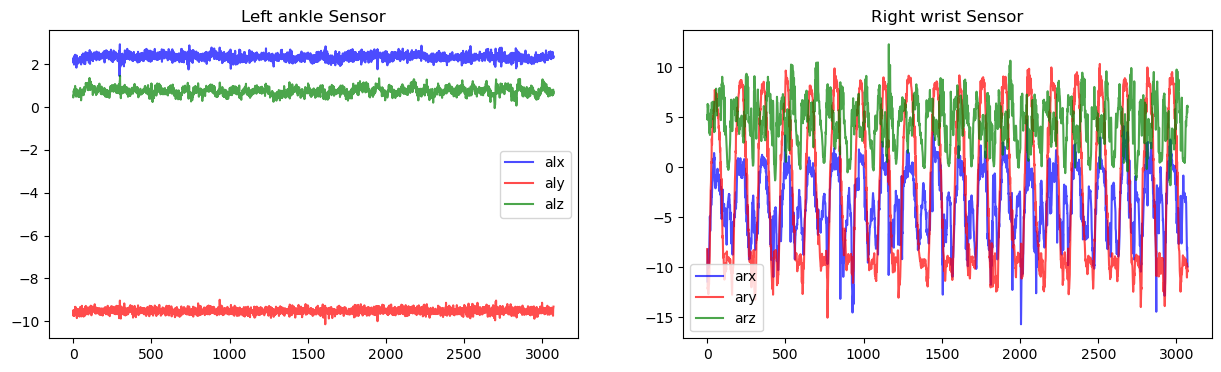



============================= Frontal elevation of arms(20x) - g =====================



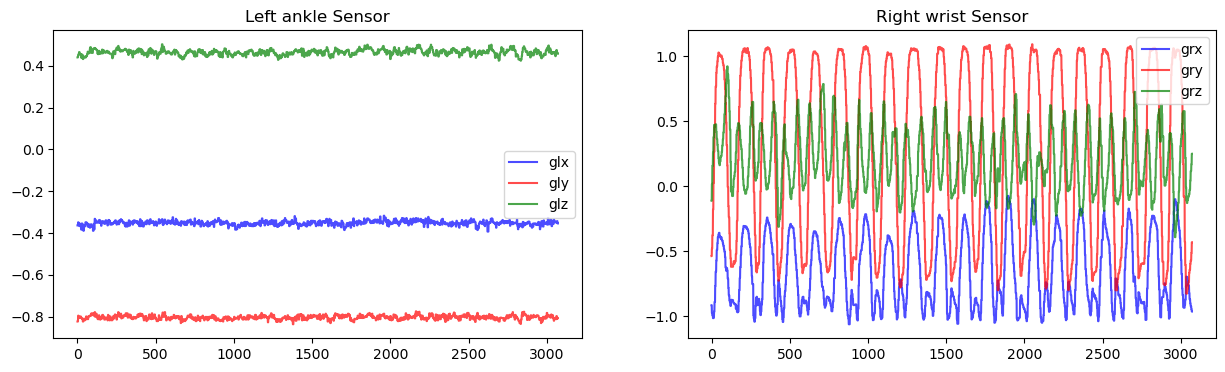



============================= Knees bending (crouching)(20x) - a =====================



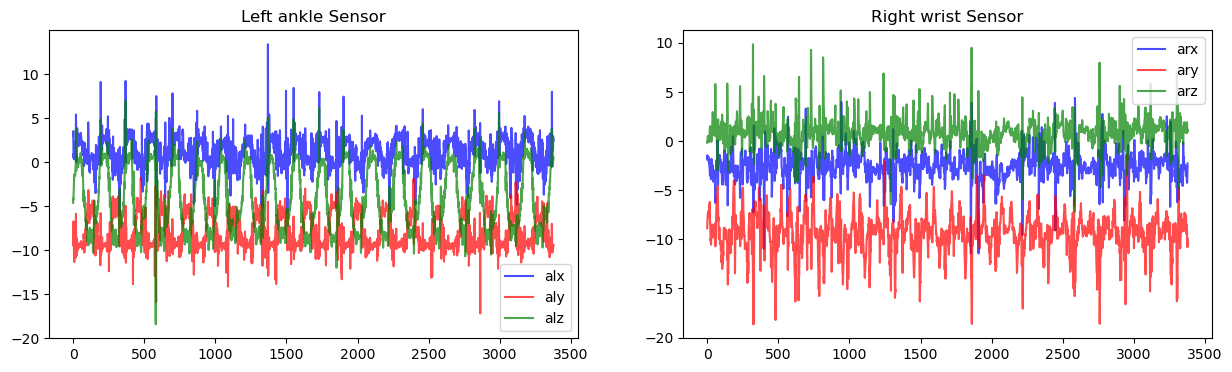



============================= Knees bending (crouching)(20x) - g =====================



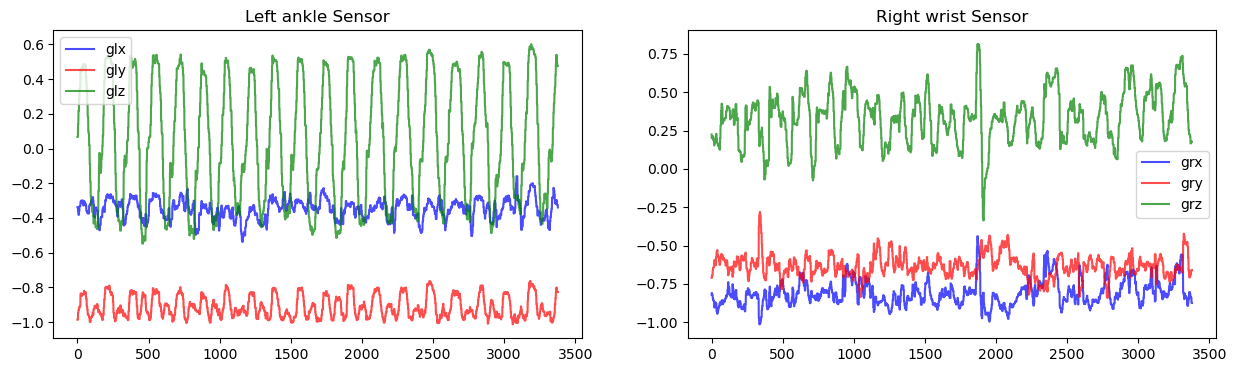



============================= Cycling(1 min) - a =====================



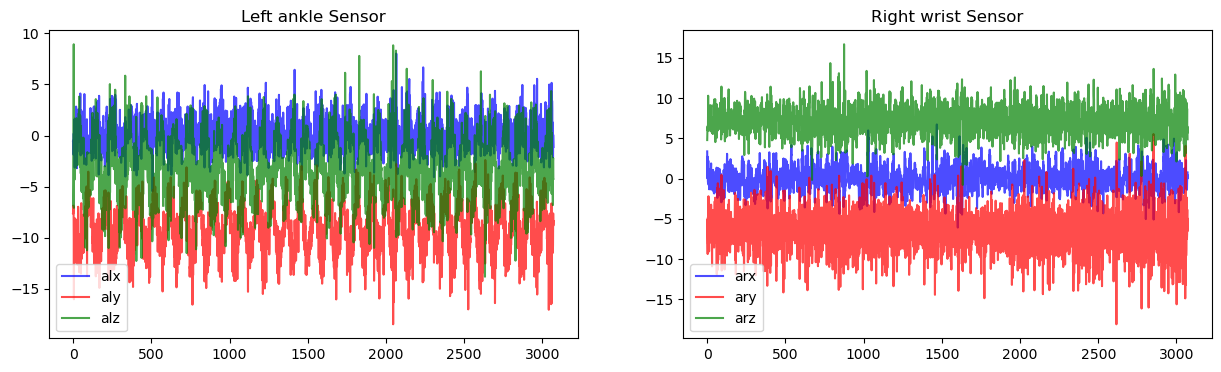



============================= Cycling(1 min) - g =====================



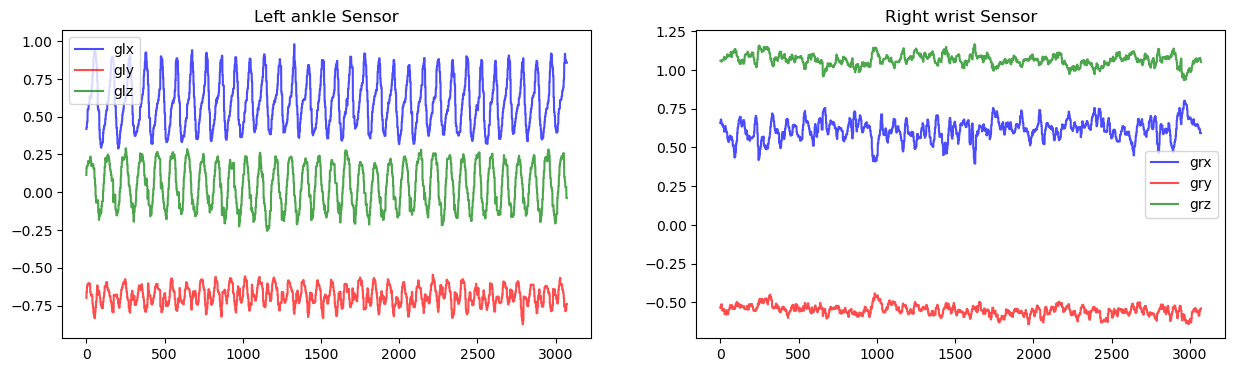



============================= Jogging(1 min) - a =====================



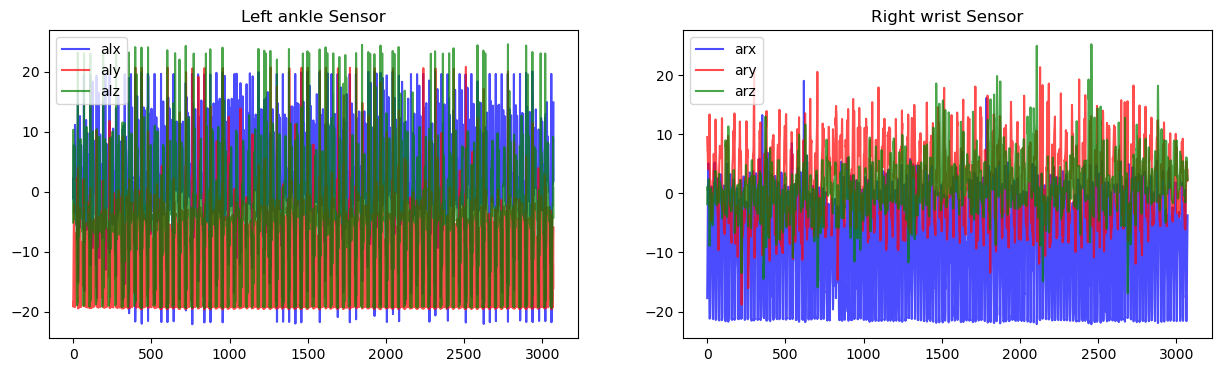



============================= Jogging(1 min) - g =====================



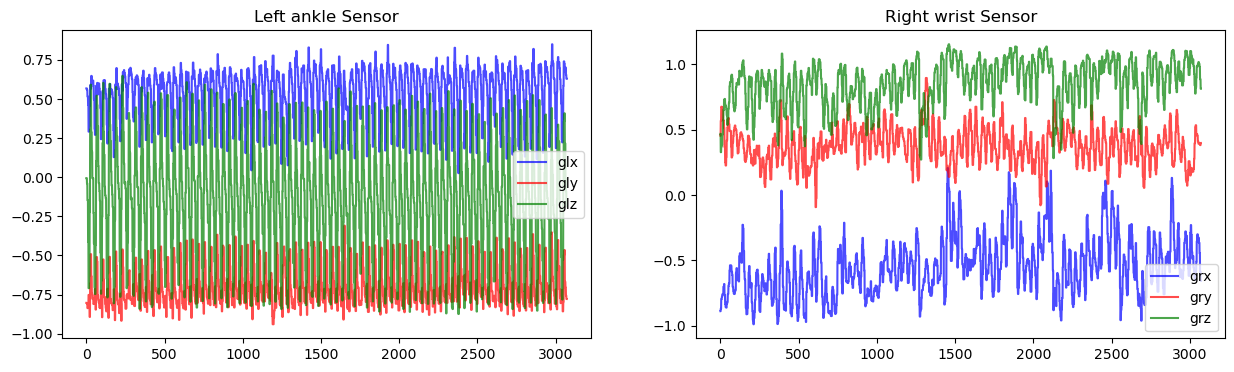



============================= Running(1 min) - a =====================



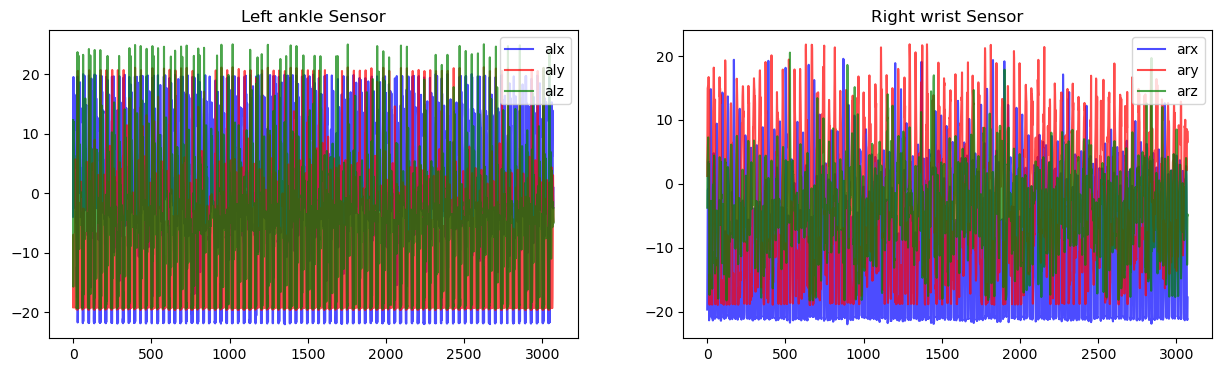



============================= Running(1 min) - g =====================



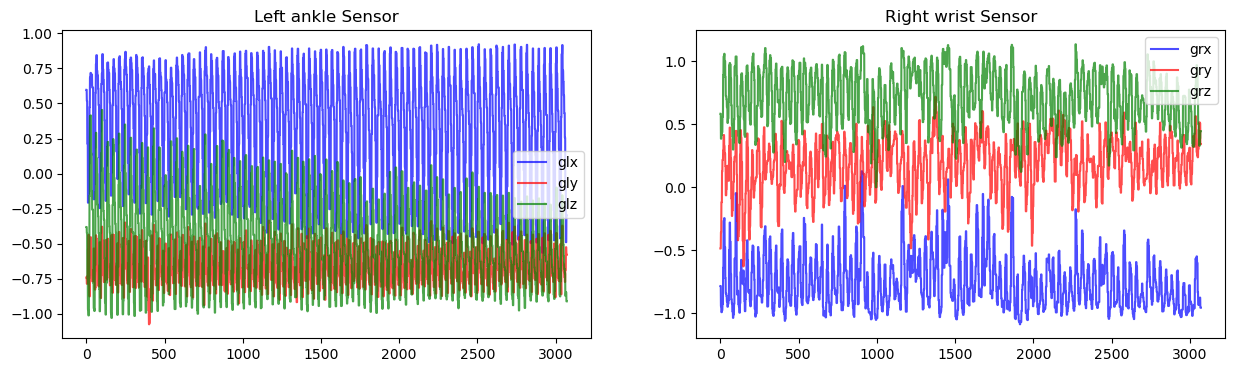



============================= Jump front & back(20x) - a =====================



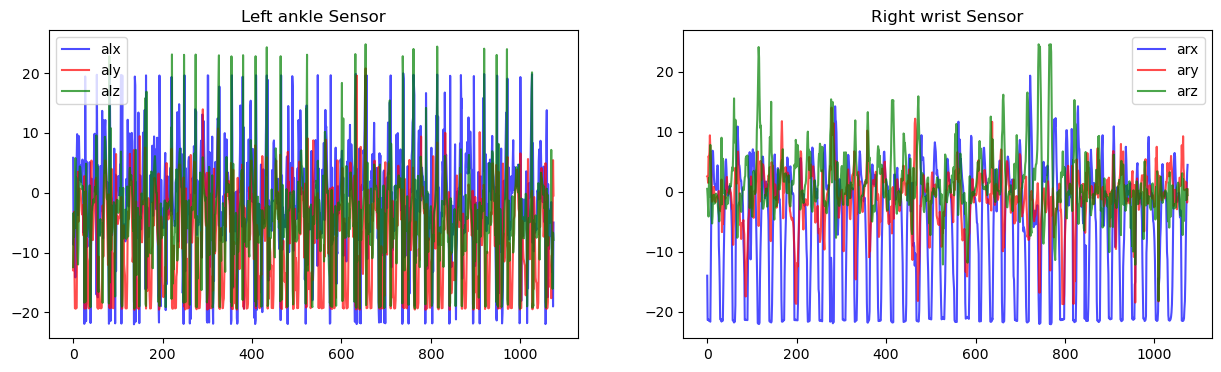



============================= Jump front & back(20x) - g =====================



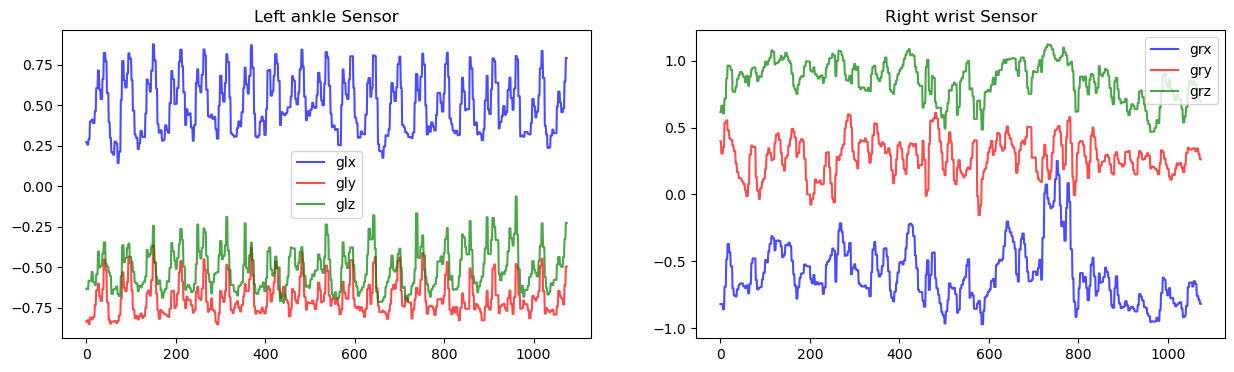

In [16]:
subject1 = df[df['subject'] == 'subject1']
reading =['a', 'g']

for i in range(1,13):
    for r in reading:
        print(f"\n\n============================= {activity_label[i]} - {r} =====================\n") 
        plt.figure(figsize=(15,4))
        plt.subplot(1,2,1)
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r+"lx"], color = 'blue', alpha = 0.7, label = r + "lx")
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r+"ly"],color = 'red', alpha = 0.7, label = r + "ly")
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r+"lz"],color = 'green', alpha = 0.7, label = r + "lz")
        plt.title("Left ankle Sensor")
        plt.legend()

        plt.subplot(1,2,2)
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r+"rx"],color = 'blue', alpha = 0.7, label = r + "rx")
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r+"ry"],color = 'red', alpha = 0.7, label = r + "ry")
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r+"rz"],color = 'green', alpha = 0.7, label = r + "rz")
        plt.title("Right wrist Sensor")
        plt.legend()

        plt.show()

In [17]:
df['Activity'] = df['Activity'].map(activity_label)
print(df['Activity'].head())

6656    Standing still(1 min)
6657    Standing still(1 min)
6658    Standing still(1 min)
6659    Standing still(1 min)
6660    Standing still(1 min)
Name: Activity, dtype: object


C:\Users\DELL\AppData\Local\Temp\ipykernel_36116\1799251033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Activity'] = df['Activity'].map(activity_label)


In [18]:
df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
6656,2.6493,-9.4517,0.37683,-0.20965,-0.88931,-0.50884,-2.8439,-9.0618,1.81770,-0.058824,-0.93429,-0.344830,Standing still(1 min),subject1
6657,2.4157,-9.5306,0.40179,-0.20965,-0.88931,-0.50884,-2.9935,-9.2048,1.51890,-0.058824,-0.93429,-0.344830,Standing still(1 min),subject1
6658,2.3865,-9.5991,0.48141,-0.20037,-0.86867,-0.50688,-2.8846,-9.1945,1.55070,-0.058824,-0.93429,-0.344830,Standing still(1 min),subject1
6659,2.3758,-9.5997,0.42919,-0.20037,-0.86867,-0.50688,-2.9245,-9.1746,1.54130,-0.078431,-0.93429,-0.340520,Standing still(1 min),subject1
6660,2.3239,-9.5406,0.40038,-0.20037,-0.86867,-0.50688,-2.8963,-9.2039,1.61270,-0.078431,-0.93429,-0.340520,Standing still(1 min),subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213641,-2.4873,-19.2330,3.46140,0.61967,-0.33771,-0.82711,-8.2348,-4.9652,2.48090,-0.437250,-1.01850,0.079741,Jump front & back(20x),subject10
1213642,-21.5910,-19.4370,-6.04190,0.61967,-0.33771,-0.82711,-21.3180,-10.2130,3.65600,-0.437250,-1.01850,0.079741,Jump front & back(20x),subject10
1213643,7.5433,-19.2450,-2.66800,0.61967,-0.33771,-0.82711,-21.2970,-18.7050,4.46060,-0.437250,-1.01850,0.079741,Jump front & back(20x),subject10
1213644,3.0142,-19.3340,-7.70740,0.71058,-0.27017,-0.75442,-21.1380,-18.6980,1.15880,-0.425490,-1.03700,0.084052,Jump front & back(20x),subject10


In [19]:
df1 = df.copy()

for feature in df1.columns[ :- 2]:
    lower_range = np.quantile(df[feature], 0.02)
    upper_range = np.quantile(df[feature], 0.98)
    print(feature, "Range: ", lower_range, "to", upper_range)

    df1 = df1.drop(df1[(df1[feature]> upper_range) | (df1[feature] <lower_range) ].index, axis = 0)
print("shape", df1.shape)

alx Range:  -6.85488 to 13.744000000000002
aly Range:  -19.328 to 1.6242
alz Range:  -18.677 to 9.910224
glx Range:  -0.69017 to 0.7569600000000001
gly Range:  -0.97186 to 0.94747
glz Range:  -1.0747 to 0.80943
arx Range:  -21.319000000000003 to 6.8862
ary Range:  -18.591 to 9.372224
arz Range:  -7.26068 to 9.912412
grx Range:  -0.99608 to 0.88039
gry Range:  -1.0986 to 0.8193
grz Range:  -0.59483 to 1.1013
shape (236118, 14)


In [20]:
le = LabelEncoder()
df1["Activity"] = le.fit_transform(df1["Activity"])

In [21]:
X = df.drop(["Activity", "subject"], axis = 1).values
y = df["Activity"].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
ro_scaler = RobustScaler().fit(X_train)

In [24]:
X_train_scaled = ro_scaler.transform(X_train)
X_test_scaled = ro_scaler.transform(X_test)

In [25]:
#Building Model

def resultsSummarizer(y_true, y_pred, cm_en = True):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = sensitivity = recall_score(y_true, y_pred, average='macro' )
    f1 = f1_score(y_true, y_pred, average='macro')
    
    if cm_en:
        plt.figure(figsize=(15,15))
        
        sns.heatmap(cm, annot = True, cmap = "Blues", xticklabels=activity_label.values(), yticklabels=activity_label.values())
        
        plt.title('Confusion Matrix')
        plt.show()
    
    print(f'Accuracy Score:'+'{:.4%}' .format(acc))
    print(f'Precision Score:'+'{:.4%}' .format(prec))
    print(f'Recall Score:'+'{:.4%}' .format(rec))
    print(f'F1 Score:'+'{:.4%}' .format(f1))
   

In [26]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
lr.score(X_test_scaled, y_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6499366249508297

In [27]:
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train_scaled, y_train)
y_pred_knn2 = knn2.predict(X_test_scaled)

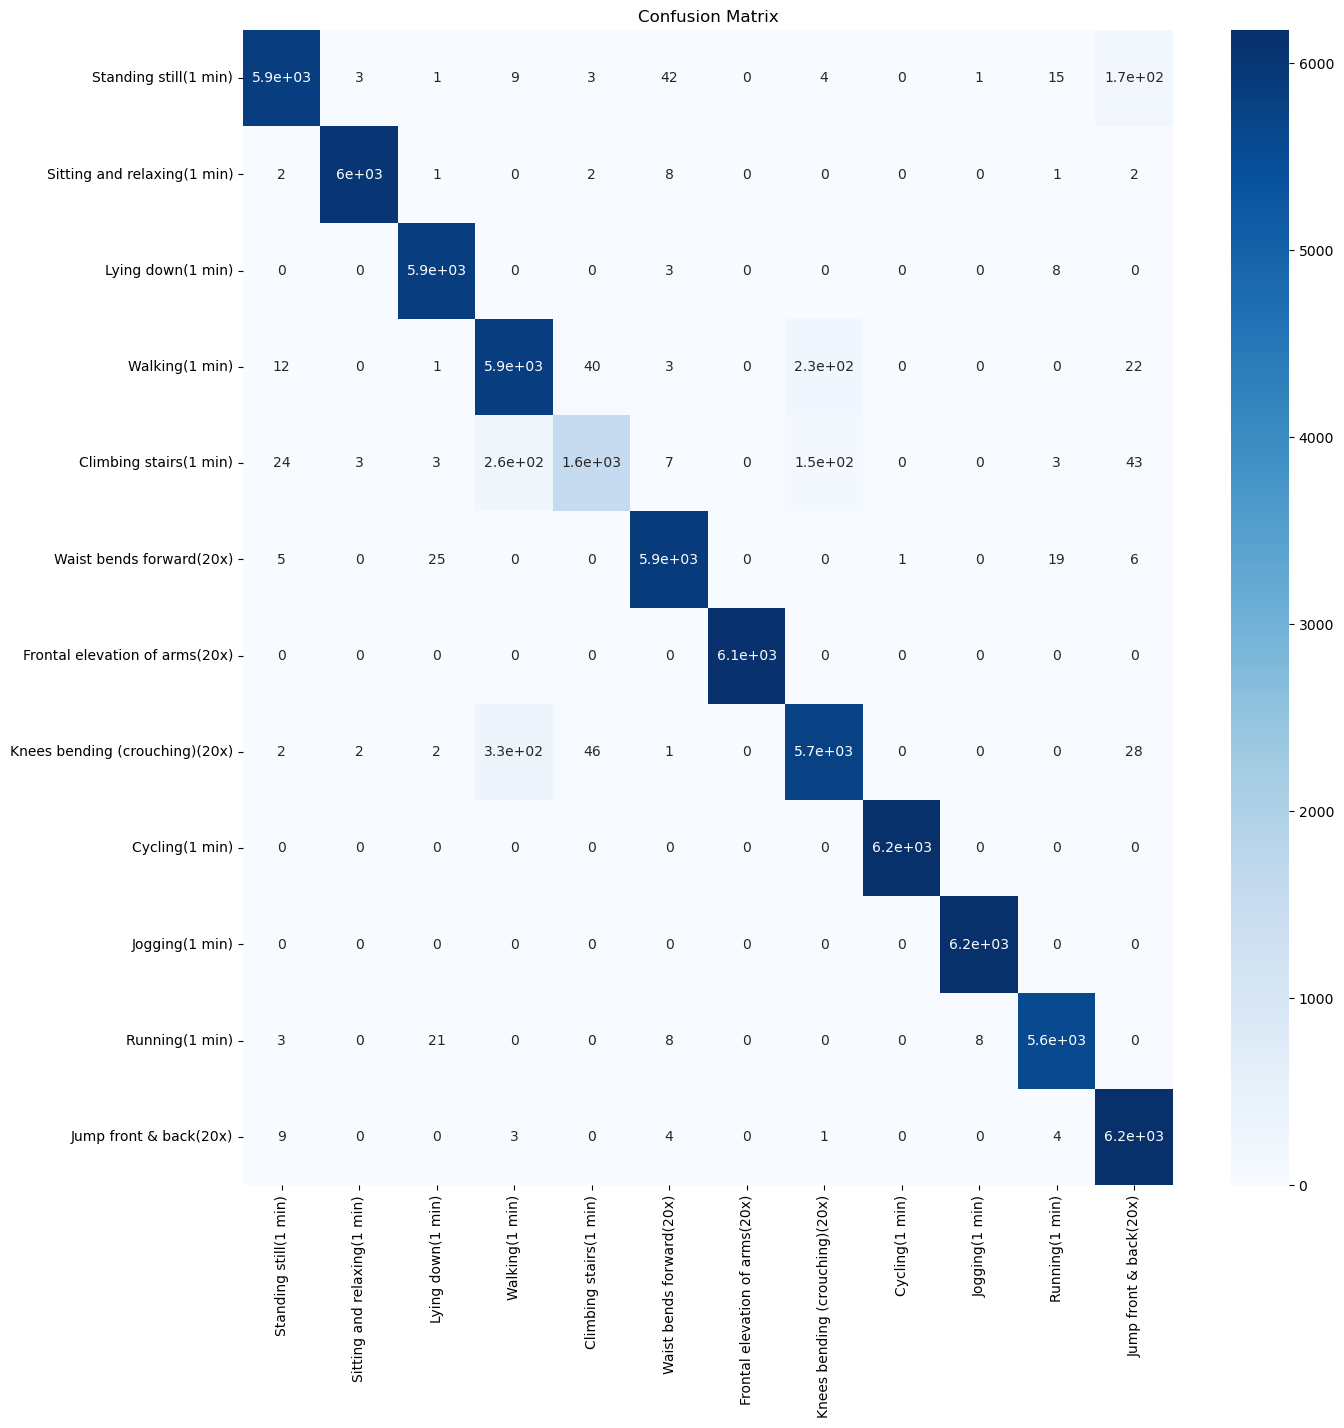

Accuracy Score:97.6588%
Precision Score:97.5258%
Recall Score:96.4768%
F1 Score:96.9068%


In [28]:
resultsSummarizer(y_test, y_pred_knn2)

In [29]:
model_params = {
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'model_C': [0.01, 0.1, 1, 10],
            'model_penalty': ['12'],
            'model_solver': ['lbfgs' ]
        }   
    },
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'params': {
            'model_n_neighbors': [3, 5, 7],
            'model_weights': ['uniform', 'distance'],
            'model_metric': ['euclidean', 'manhattan']
        }
    },
    'SVC': {
        'model': SVC(),
        'params' : {
            'model_C': [0.1, 1, 10],
            'model_kernel': ['linear', 'rbf'],
            'model_gamma': ['scale', 'auto']
        }
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'params': {
            'model_n_estimators': [100, 200],
            'model_max_depth': [None, 10, 20],
            'model_min_samples_split': [2, 5]
        }
    },
    'GaussianNB': {
        'model': GaussianNB(),
        'params': {
# GaussianNB typically doesn't have many tunable params
        }
    }
}

In [30]:
from sklearn.pipeline import Pipeline

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

results = []

for model_name, mp in model_params.items():
    print(f"\n🔍 Running GridSearchCV for: {model_name}")

    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', mp['model'])
    ])

    clf = GridSearchCV(
        pipe,
        mp['params'],
        cv=5,
        n_jobs=-1,
        scoring='f1_weighted',
        verbose=1
    )

    clf.fit(X_train, y_train)

    print(f" Best params for {model_name}: {clf.best_params_}")
    print(f" Best cross-validation F1-score: {clf.best_score_:.4f}")

    y_pred = clf.predict(X_test)
    print(f"\n📑 Classification Report for {model_name}:\n", classification_report(y_test, y_pred))

    results.append({
        'model': model_name,
        'best_params': clf.best_params_,
        'f1_score': clf.best_score_
    })



🔍 Running GridSearchCV for: LogisticRegression
Fitting 5 folds for each of 4 candidates, totalling 20 fits


ValueError: Invalid parameter 'model_C' for estimator Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=1000))]). Valid parameters are: ['memory', 'steps', 'transform_input', 'verbose'].